# The Sparks Foundation
##(Task 3- Exploratory Data Analysis) - Retail - Dataset of SampleSuperStore 

>[The Sparks Foundation](#scrollTo=171db9b2)

>>[(Task 3- Exploratory Data Analysis) - Retail - Dataset of SampleSuperStore](#scrollTo=171db9b2)

>>[1) Importing the libraries](#scrollTo=303f1f49)

>>[2) Importing the dataset](#scrollTo=490dcd49)

>>[3) Data Cleaning](#scrollTo=6c23cf9b)

>>[4) Data Visualisation](#scrollTo=da9a70a7)

>>>[( I ) Category and Sub Category wise Analysis](#scrollTo=JygxwbJst7r1)

>>>>[4.1) Category & Sub-Category Distribution](#scrollTo=jRS_QgbpWux2)

>>>>[4.2) Category wrt Ship Mode](#scrollTo=DF-BCO_MnQig)

>>>>[4.3) Total Sales by Category](#scrollTo=WEXdwDFpW5eR)

>>>>[4.4) Total Sales by Category & Region](#scrollTo=djRedBc8eaCq)

>>>>[4.5)  Profit & Loss distribution across the various Sub-Categories](#scrollTo=oyrOVHvVhwY_)

>>>>[4.6)   Sales vs Profit](#scrollTo=Vyru-pk5esNg)

>>>>[4.7) Average Sales, Profit, Quantity, and Discount values for each Category](#scrollTo=Zyi8Hw02fGl7)

>>>[( II ) States / Cities  Analysis](#scrollTo=xkGaAI06uF66)

>>>>[5.1) Orders from all States](#scrollTo=Jh2HxMOBlU2t)

>>>>[5.2) Top 10 States by Profit and Sales](#scrollTo=eN6hcIlukLA6)

>>>>[5.3) Top 10 Cities by Sale](#scrollTo=RX7IkkwVekJw)

>>>>[5.4) Sales by Segment, Region, & Category  visualized via Heatmap](#scrollTo=WrA2o7MqgsVX)

>>>>[5.5) Profit by  State and Category](#scrollTo=kZ32gpb7u7h4)



## 1) Importing the libraries

In [32]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualisation Libraries
import seaborn as sns
%matplotlib inline
from plotnine import *
from plotnine import ggplot, aes, geom_bar, scale_fill_manual
import warnings
warnings.filterwarnings('ignore')

!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2) Importing the dataset

In [83]:
S_store = pd.read_csv('/content/drive/MyDrive/Spark/SampleSuperstore.csv')


In [37]:
S_store.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [38]:
S_store.tail(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [39]:
S_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [40]:
S_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [84]:
S_store.shape

(9994, 13)

## 3) Data Cleaning

In [41]:
S_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [42]:
## Checking Duplicated values
S_store.duplicated().sum()

17

In [43]:
## Deleting Duplicated values if any
S_store.drop_duplicates(inplace=True)

In [44]:
## founding out any duplicates left from the SampleSuperStore file
S_store.duplicated().sum()


0

In [45]:
## Displaying the unique data
S_store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [46]:
##Dropping of Irrelevant columns like we have postal code in the SampleSuperStore file
col =['Postal Code']
drop =S_store.drop(columns=col, axis=1, inplace =True)

## 4) Data Visualisation

###  ( I ) Category and Sub Category wise Analysis

####1) Category & Sub-Category Distribution

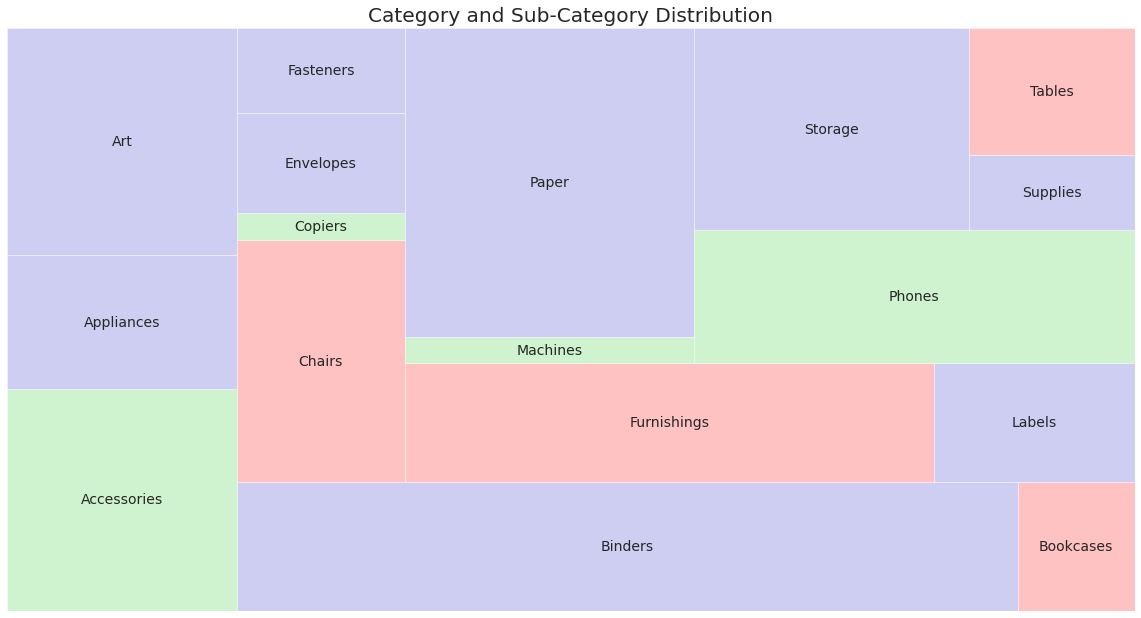

In [70]:
sns.set_style("darkgrid")
# plt.style.use('fivethirtyeight')
# create a new column that concatenates "Category" and "Sub-Category"
S_store['Category-Sub'] = S_store['Sub-Category']

# create a pivot table with Category-Sub as rows, Category as columns, and count as values
pivot_data = pd.pivot_table(S_store, index='Category-Sub', columns='Category', values='Sub-Category', aggfunc='count')

# define colors
category_colors = ['#ffb3b3','#c2c2f0','#c2f0c2']

# create a dictionary that maps Category to its corresponding color
category_color_dict = {category: color for category, color in zip(pivot_data.columns, category_colors)}

# create a list of colors for each Category-Sub combination
colors = [category_color_dict[category] for category in pivot_data.idxmax(axis=1)]

# create a treemap plot
fig, ax = plt.subplots(figsize=(18,10))
squarify.plot(sizes=pivot_data.sum(axis=1).values, label=pivot_data.index.tolist(), alpha=.8, color=colors)
plt.axis('off')

# set title
ax.set_title('Category and Sub-Category Distribution')

# show plot

plt.show();

**Key Notes 📝:**

The color of each square represents the corresponding category, with 

pink for furniture, purple for office supplies, and green for technology.

▶ Binders are Maximum in Quantity, followed by Papers  and Furnishings 




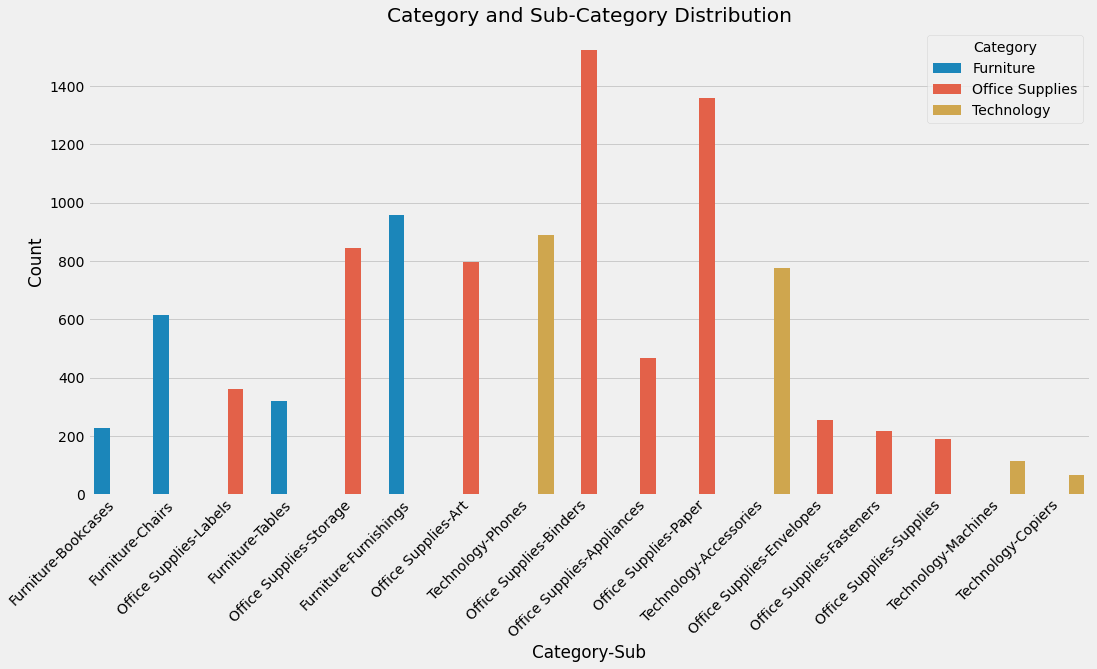

In [62]:

# create a new column that concatenates "Category" and "Sub-Category"
S_store['Category-Sub'] = S_store['Category'] + '-' + S_store['Sub-Category']

# create a countplot with Category-Sub on x-axis and hue set to Category
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Category-Sub', data=S_store, hue='Category', ax=ax)

# set title and labels
ax.set_title('Category and Sub-Category Distribution')
ax.set_xlabel('Category-Sub')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')

# show plot
plt.show()


####2) Category wrt Ship Mode

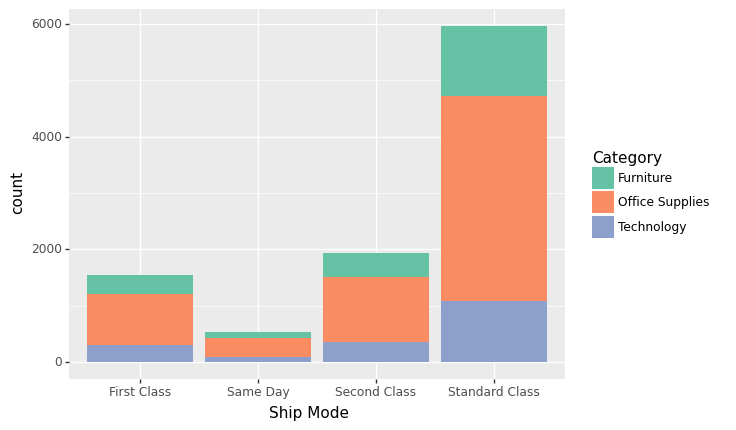

<ggplot: (8728758806550)>

In [63]:
#Category wrt Ship Mode
# define color palette
colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

# create plot with custom fill colors
ggplot(S_store, aes(x='Ship Mode', fill='Category')) + \
    geom_bar(stat='count') + \
    scale_fill_manual(values=colors)


#### 3) Total Sales by Category

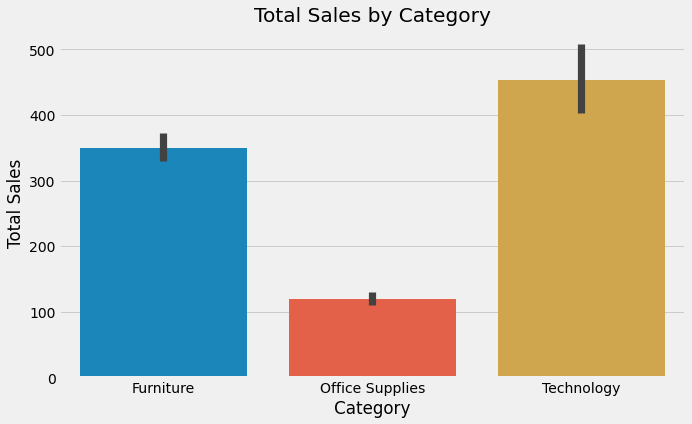

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=S_store)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


#### 4) Total Sales by Category & Region

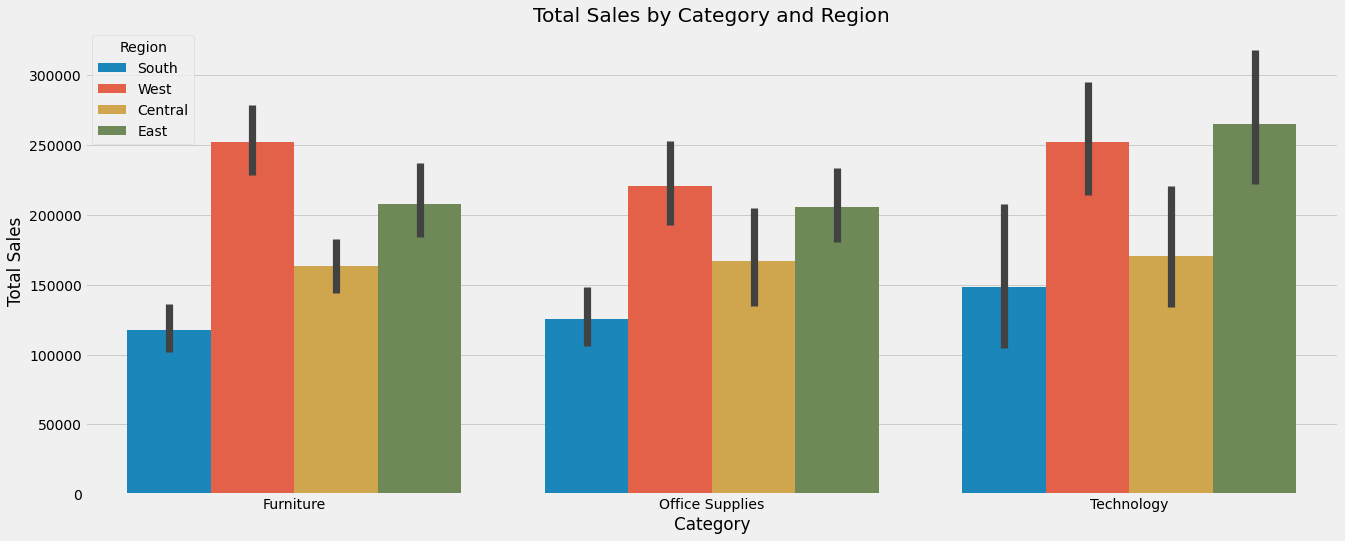

In [65]:
plt.figure(figsize=(20,8))
sns.barplot(x='Category', y='Sales', hue='Region', data=S_store, estimator=sum)
plt.title('Total Sales by Category and Region')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


**Key Notes 📝:**

Grouped bar plot showing the total sales of each category in different regions. 
The hue parameter shows the different regions. 

▶ Sales of all category combinely is maximum in West Region

▶ Sales in each Category is Lowest in South Region





####5)  Profit & Loss distribution across the various Sub-Categories




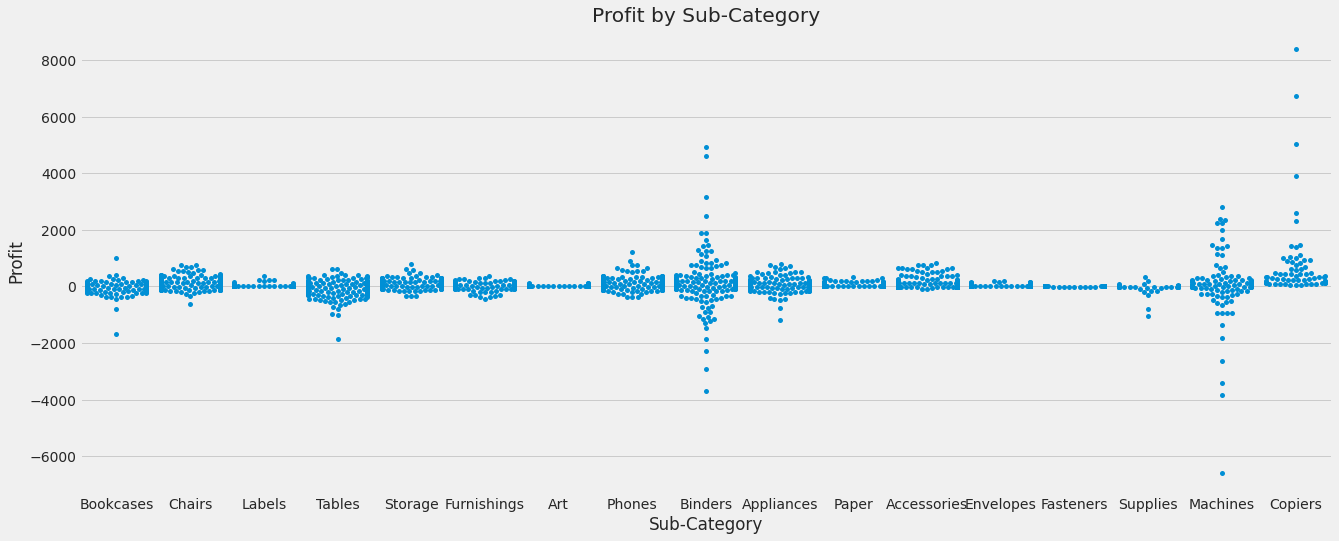

In [85]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Sub-Category', y='Profit', data=S_store)
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

####6)   Sales vs Profit

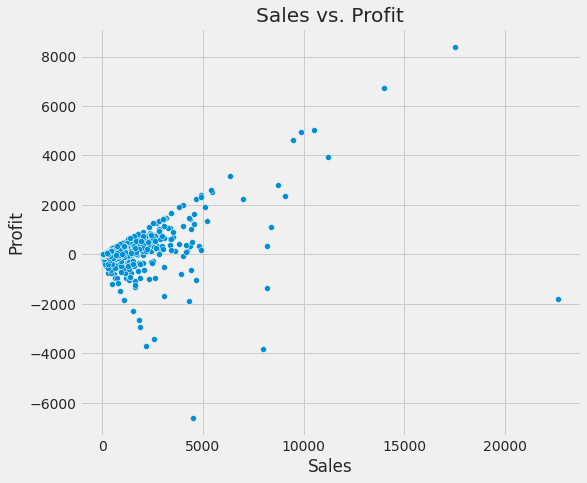

In [86]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Sales', y='Profit', data=S_store)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


####7) Average Sales, Profit, Quantity, and Discount values for each Category 


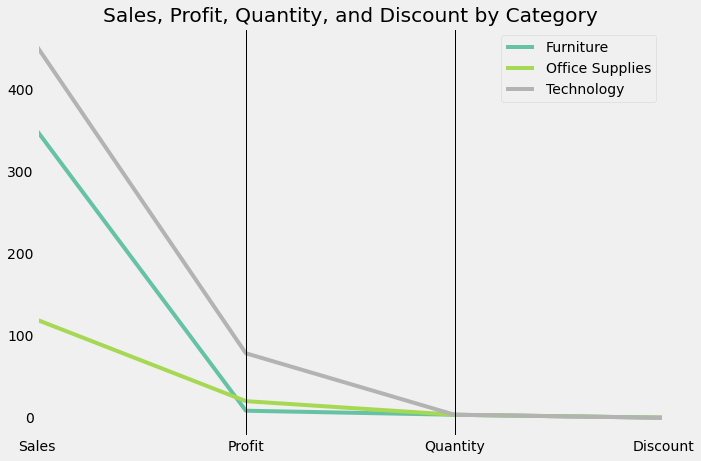

In [55]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,7))
S_store_parallel = S_store.groupby('Category').agg({'Sales': 'mean', 'Profit': 'mean', 'Quantity': 'mean', 'Discount': 'mean'}).reset_index()
parallel_coordinates(S_store_parallel, 'Category', colormap=plt.get_cmap('Set2'))
plt.title('Sales, Profit, Quantity, and Discount by Category')
plt.show()

**Key Notes 📝:**


The plot shows that the Technology category has the highest Sales and Profit, while the Office Supplies category has the lowest Sales and Profit.

▶ The Technology category is the most profitable, while the Office Supplies is the least profitable.

▶ The Technology category has the highest discount rates, which might be contributing to its higher sales volume.





### ( II ) States / Cities  Analysis

####1) Orders from all States

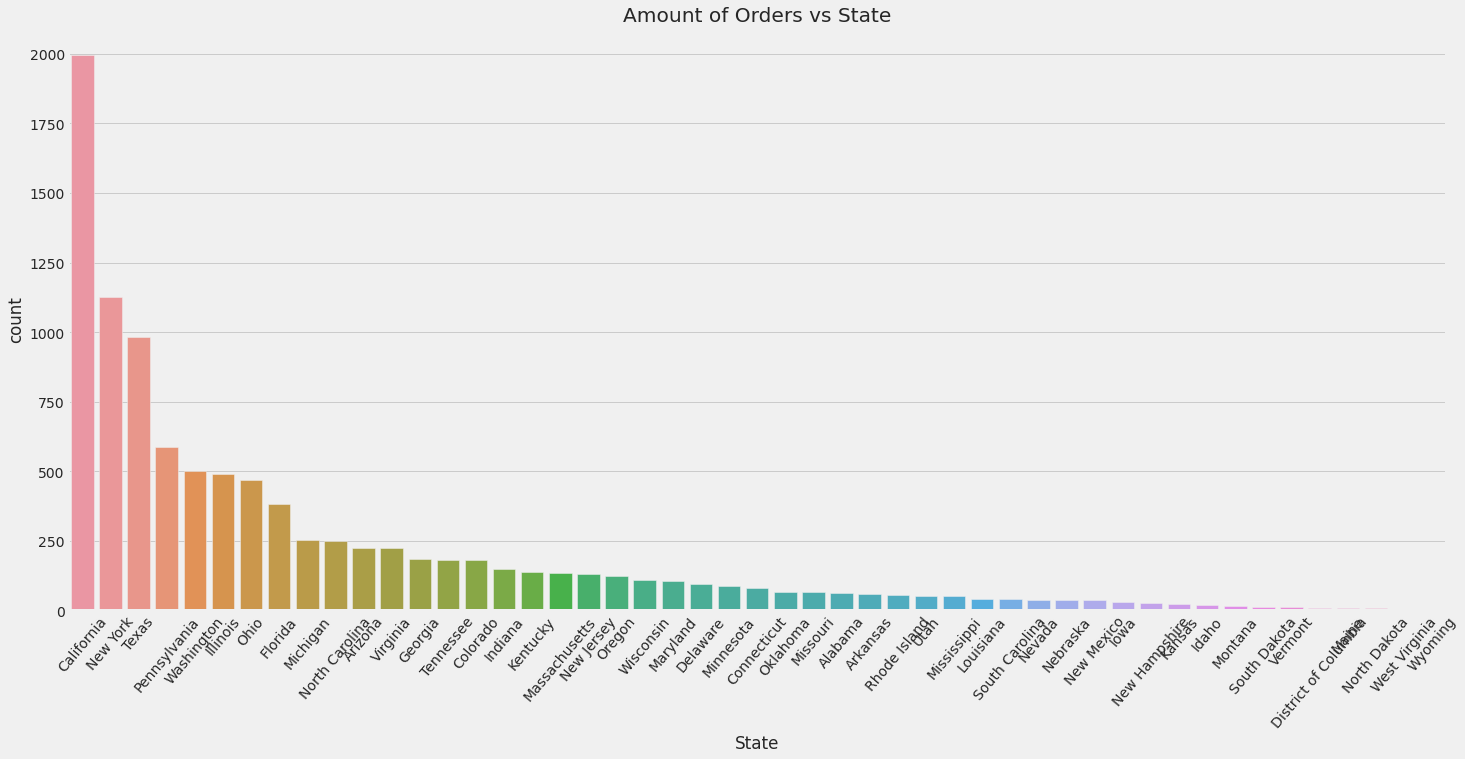

In [80]:
plt.figure(figsize=(22,10))
sns.countplot(x=S_store['State'],order =S_store['State'].value_counts().index)
plt.style.use('fivethirtyeight')
plt.xticks(rotation=50)
plt.title('Amount of Orders vs State')
plt.show()

####2) Top 10 States by Profit and Sales




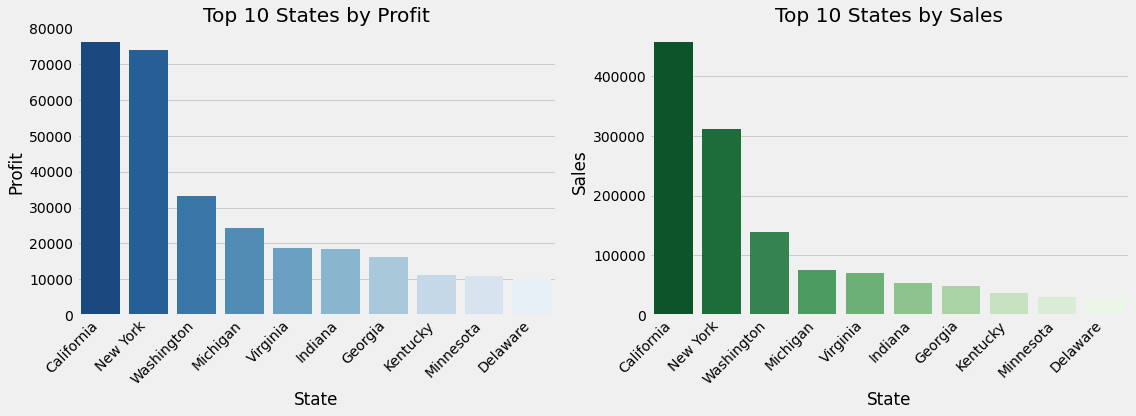

In [57]:
# group the data by state and aggregate by sum of profit and sales
state_data = S_store.groupby('State').agg({'Profit': 'sum', 'Sales': 'sum'}).sort_values(by='Profit', ascending=False).head(10)

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# plot top 10 states by profit
sns.barplot(x=state_data.index, y='Profit', data=state_data, ax=ax1, palette='Blues_r')
ax1.set_title('Top 10 States by Profit')
ax1.set_xlabel('State')
ax1.set_ylabel('Profit')

# plot top 10 states by sales
sns.barplot(x=state_data.index, y='Sales', data=state_data, ax=ax2, palette='Greens_r')
ax2.set_title('Top 10 States by Sales')
ax2.set_xlabel('State')
ax2.set_ylabel('Sales')

# rotate the x-axis labels to prevent overlap
for ax in [ax1, ax2]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Key Notes 📝:**

▶ California is the top state in both profit and sales, followed by New York and Washington

▶ We can also observe that the ranking of states by profit is not necessarily the same as the ranking by sales.




#### 3) Top 10 Cities by Sale

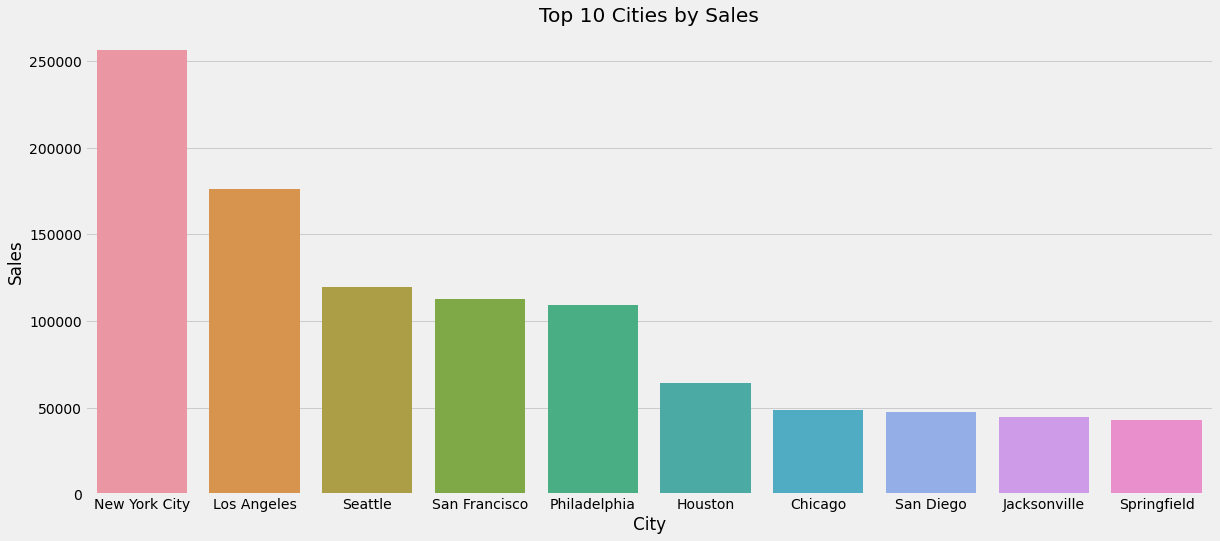

In [58]:
top_cities = S_store.groupby('City')['Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(18,8))
sns.barplot(x='City', y='Sales', data=top_cities)
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()


####4) Sales by Segment, Region, & Category  visualized via Heatmap 



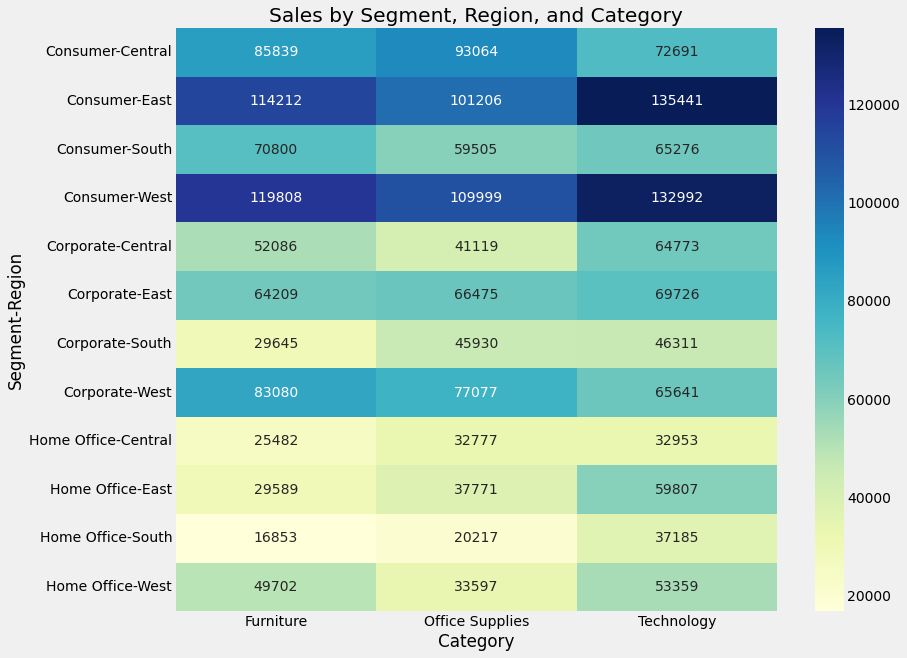

In [59]:
plt.figure(figsize=(12,10))
S_store_sales = S_store.groupby(['Segment', 'Region', 'Category'])['Sales'].sum().reset_index()
S_store_sales_pivot = S_store_sales.pivot(index=['Segment', 'Region'], columns='Category', values='Sales')
sns.heatmap(S_store_sales_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales by Segment, Region, and Category')
plt.show()


**Key Notes 📝:**


▶ Furniture Sales is highest in Consumer Segment of West Region.

▶ Similarly Office Supplies Sales is also  highest in  Consumer Segment of West Region.

▶ Office Supplies Sales is also  highest in  Consumer Segment of West Region as well as in East Region.

▶ Lowest Values of Sales is obseved in Home Office Segment in all four Regions.




#### 5) Profit by  State and Category 


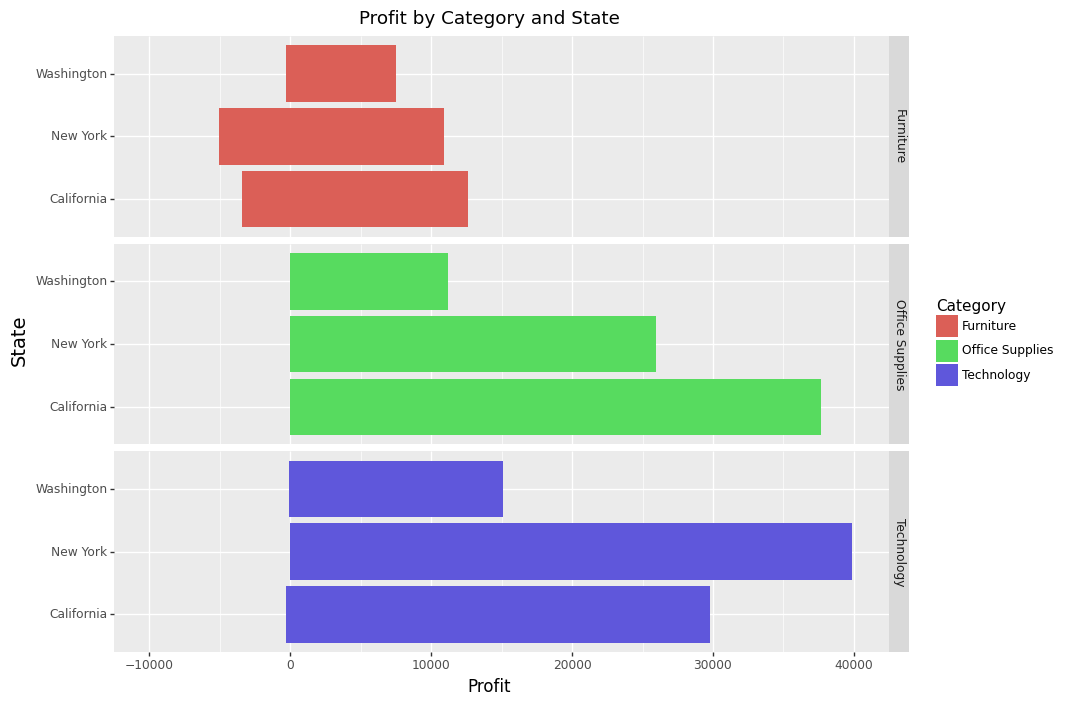

<ggplot: (8728760722423)>

In [60]:
S_store_top3 = S_store[S_store['State'].isin(['California', 'New York', 'Washington'])]

(ggplot(S_store_top3, aes(x='State', y='Profit', fill='Category')) +
    geom_bar(stat='identity') +
    facet_grid('Category~.') +
    coord_flip() +
    ylim(-10000, 40000) +
    ggtitle('Profit by Category and State') +
    theme(figure_size=(10, 8),
          axis_title_y=element_text(size=14),
          axis_title_x=element_text(size=12, position=(0.5, 1.08), ha='center'))
)


**Key Notes 📝:**

The plot shows the profit earned by three different categories (Furniture, Office Supplies, and Technology) 
in Top 3 states (California, New York, and Washington)

▶ California is the most profitable state in Furniture and Office Supplies Category.

▶ New York is the most profitable state in Technology Category.


